# <a name="top">WeRateDogs - Udacity Data Wrangling Project 03 </a>
---
## Gather 3 datasets from 3 different sources:
1. [Gather Data #1](#gather1) - Twitter archive, twitter-archive-enhanced.csv (local archive). format: CSV
2. [Gather Data #2](#gather2) - Tweet image predictions - Download data from file_url utilizing requests library. format: TSV
3. [Gather Data #3](#gather3) - Query Twitter API for additional data - image_preds (local archive created from image recognition system). format: TXT

## (8) Quality Issues 
Also known as dirty data which includes mislabeled, corrupted, duplicated, inconsistent content issues, etc.

### twitter-archive-enhanced.csv quality issues:

1. [Quality #1](#q1) - columns 'timestamp' & 'retweeted_status_timestamp' are objects (strings) and not of 'timestamp' type. Change type to timestamp.

2. [Quality #2](#q2) - twitterDF.name contains a lot of non-dog names, e.g. 'a'; Replace with np.NaN
   
3. [Quality #3](#q3) - doggo, floofer, pupper, & puppo use None; Replace with 0, and 1 where 'doggo, floofer, etc...' 

4. [Quality #4](#q4) - remove URL from 'source' & replace with 4 categories: iphone, vine, twitter, tweetdeck

5. [Quality #5](#q5) - retweeted_status_id is of type float; change to object(text)

6. [Quality #6](#q6) - `in_reply_to_status_id` and `in_reply_to_user_id` are type float. Convert to string
 

### rt_tweets quality issues:

7. [Quality #7](#q7) - rename column for tweet ID uniformity

8. [Quality #8](#q8) - remove retweets


---
## (2) Tidiness Issues
Messy data includes structural issues where variables don't form a column, observations form rows, & each observational unit forms a table.

1. [Tidy #1](#t1) - create new dataframe of columns needed

2. [Tidy #2](#t2) - merge all 3 datasets

3. [Tidy #3](#t3) - variables from rows and columns --> doggo, floofer, pupper, puppo. Create new column, e.g. 'Dog_type' and specify which, if any, is represented. The problem is there numerous tweets where more than 1 'dog type' is specified. I don't think one can arbitrarily choose which type should be used in the dataset where 1+ (doggo, floofer, etc.) are specified. 
---
## Examples of assessments:
### Visuals
1. [Visual 1](#vis1) - Horizontal Bar Chart (WeRateDogs Dog Breeds represented (top 10))
2. [Visual 2](#vis2) - Horizontal Bar Chart (Top 15 Favorites (tweets), by probable name)

### Programatic
1. [Programatic 1](#prog1) - Percentages, Value Counts, etc.
2. [Programatic 2](#prog2) - Grouping of dataframe on the first predicted name for various mean data

### Saved new dataframe to file 
[Save to file, WeRateDogs_migration.csv](#save1) to file.


[BACK TO TOP](#top)

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import os
import requests

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
%matplotlib inline

In [4]:
mainDF = pd.read_csv('data/twitter-archive-enhanced.csv')
mainDF.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [5]:
replytweetsDF = mainDF[mainDF.in_reply_to_status_id.notnull()]

In [6]:
replytweetsDF.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1356,703425003149250560,7.030419e+17,4.196984e+09,2016-02-27 03:42:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Really guys? Again? I know this is a rare Alba...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703425003...,9,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None
513,811647686436880384,8.116272e+17,4.196984e+09,2016-12-21 19:01:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I've been informed that Augie was act...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
611,797165961484890113,7.971238e+17,2.916630e+07,2016-11-11 19:55:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@JODYHiGHROLLER it may be an 11/10 but what do...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
1866,675349384339542016,6.749998e+17,4.196984e+09,2015-12-11 16:20:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yea I lied. Here's more. All 13/10 https://t.c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675349384...,13,10,None,None,None,None,None


In [7]:
mainDF[mainDF.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [8]:
mainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## <a name="gather1">Gather Data #1 - Twitter archive</a>

In [9]:
twitterDF = pd.read_csv("data/twitter-archive-enhanced.csv")
twitterDF.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
twitterDF[twitterDF.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [11]:
# review data columns in DF, are Dtypes appropriate, etc.
twitterDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

[BACK TO TOP](#top)

In [12]:
# review names of pups
twitterDF.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
            ... 
Snickers       1
Juckson        1
Jebberson      1
Scruffers      1
Daniel         1
Name: name, Length: 957, dtype: int64

In [13]:
# review dogtionary names; interesting to see id# 200 has 2 values, doggo & floofer
twitterDF[twitterDF['floofer'] != 'None'].head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,None,None


In [14]:
# it appears the designations were pulled from the tweeted text, 'doggo' & 'floofer' in text below
twitterDF.loc[200,'text']

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

In [15]:
# Illustrating that pup designations are NOT singular. Multiple 
twitterDF[twitterDF['doggo'] != 'None'].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
344,832032802820481025,NaN,NaN,2017-02-16 01:04:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Miguel. He was the only remaining dogg...,NaN,NaN,NaN,"https://www.petfinder.com/petdetail/34918210,h...",12,10,Miguel,doggo,None,None,None
881,760521673607086080,NaN,NaN,2016-08-02 17:04:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Doggo want what doggo cannot have. Temptation ...,NaN,NaN,NaN,https://vine.co/v/5ApKetxzmTB,12,10,None,doggo,None,None,None
248,845397057150107648,NaN,NaN,2017-03-24 22:08:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mimosa. She's an emotional suppor...,NaN,NaN,NaN,"https://www.gofundme.com/help-save-a-pup,https...",13,10,Mimosa,doggo,None,None,None
919,756526248105566208,NaN,NaN,2016-07-22 16:28:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",All hail sky doggo. 13/10 would jump super hig...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756526248...,13,10,None,doggo,None,None,None


## <a name="q1"> Q1 - Convert dtype of timestamp columns</a>

In [16]:
# Fixed 2 columns with incorrect datatypes, changed to datetime64
twitterDF.timestamp = pd.to_datetime(twitterDF.timestamp)
twitterDF.retweeted_status_timestamp = pd.to_datetime(twitterDF.retweeted_status_timestamp)
twitterDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

## <a name="q2"> Q2 - dog names = 'a', replace with NaN </a>

In [17]:
# replace puppo's names that match 'a' with NaN
twitterDF.name = np.where(twitterDF.name == 'a', np.NaN, twitterDF.name)

In [18]:
# check to ensure all 'a' names were removed 
twitterDF[twitterDF.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## <a name="q3"> Q3 - doggo, floofer, pupper, & puppo use None; Replace with NaN, or 0, & 1 for present </a>

In [19]:
# replace 'None' with 0
# replace 'doggo' with 1
twitterDF.doggo = np.where(twitterDF.doggo == 'None', 0, twitterDF.doggo)
twitterDF.doggo = np.where(twitterDF.doggo == 'doggo', 1, twitterDF.doggo)

In [20]:
# replace 'None' with 0
# replace 'floofer' with 1
twitterDF.floofer = np.where(twitterDF.floofer == 'None', 0, twitterDF.floofer)
twitterDF.floofer = np.where(twitterDF.floofer == 'floofer', 1, twitterDF.floofer)

In [21]:
# replace 'None' with 0
# replace 'pupper' with 1
twitterDF.pupper = np.where(twitterDF.pupper == 'None', 0, twitterDF.pupper)
twitterDF.pupper = np.where(twitterDF.pupper == 'pupper', 1, twitterDF.pupper)

In [22]:
# replace 'None' with 0
# replace 'puppo' with 1
twitterDF.puppo = np.where(twitterDF.puppo == 'None', 0, twitterDF.puppo)
twitterDF.puppo = np.where(twitterDF.puppo == 'puppo', 1, twitterDF.puppo)

In [23]:
# check to ensure cleaning successful
twitterDF[twitterDF.puppo == 'None'].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

In [24]:
# check to ensure cleaning successful
twitterDF.query("floofer == 1")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,0,1,0,0
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/854010172...,11,10,None,1,1,0,0
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,0,1,0,0
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/776218204...,13,10,None,0,1,0,0
984,749317047558017024,NaN,NaN,2016-07-02 19:01:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/749317047...,12,10,Blu,0,1,0,0
1022,746542875601690625,NaN,NaN,2016-06-25 03:17:46+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a golden floofer helping with the groce...,NaN,NaN,NaT,https://vine.co/v/5uZYwqmuDeT,11,10,None,0,1,0,0
1091,737445876994609152,NaN,NaN,2016-05-31 00:49:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Just wanted to share this super rare Rainbow F...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/737445876...,13,10,None,0,1,0,0
1110,733822306246479872,NaN,NaN,2016-05-21 00:50:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,0,1,0,0
1534,689993469801164801,NaN,NaN,2016-01-21 02:10:37+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,NaN,NaN,NaT,https://vine.co/v/ienexVMZgi5,12,10,None,0,1,0,0
1614,685307451701334016,NaN,NaN,2016-01-08 03:50:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Petrick. He's an Altostratus Floo...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/685307451...,11,10,Petrick,0,1,0,0


## <a name="q4"> Q4 - remove URL from 'source' & replace with 4 categories: iphone, vine, twitter, tweetdeck </a>

In [25]:
# review names of sources
twitterDF.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [26]:
twitterDF.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,0,0,0,0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,0,0,0,0


In [27]:
# function to categorize source column

def update_source(row):
    if 'iphone' in row:
        return 'iphone'
    elif 'vine' in row:
        return 'vine'
    elif 'Twitter' in row:
        return 'twitter web client'
    elif 'TweetDeck' in row:
        return 'TweetDeck'

In [28]:
# run update_source function on every row to replace source text with shorter description of source
twitterDF.source = twitterDF.apply(lambda row: update_source(row['source']),axis=1)

In [29]:
# check to ensure function replaced items as intended
twitterDF.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2312,666776908487630848,NaN,NaN,2015-11-18 00:36:17+00:00,iphone,This is Josep. He is a Rye Manganese mix. Can ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666776908...,5,10,Josep,0,0,0,0
1350,704113298707505153,NaN,NaN,2016-02-29 01:17:46+00:00,iphone,Meet Stanley. He's an inverted Uzbekistani wat...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/704113298...,8,10,Stanley,0,0,0,0
352,831315979191906304,NaN,NaN,2017-02-14 01:35:49+00:00,twitter web client,I couldn't make it to the #WKCDogShow BUT I ha...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/831315979...,13,10,None,0,0,1,0
727,782305867769217024,NaN,NaN,2016-10-01 19:47:08+00:00,iphone,This is Sampson. He just graduated. Ready to b...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/782305867...,12,10,Sampson,1,0,0,0
2190,668960084974809088,NaN,NaN,2015-11-24 01:11:27+00:00,iphone,Meet Jaycob. He got scared of the vacuum. Hide...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/668960084...,10,10,Jaycob,0,0,0,0


## <a name="q6">Q6 - `in_reply_to_status_id` and `in_reply_to_user_id` are type float. Convert to string</a>

In [30]:
# data exploration
# see sample of is_reply_to_status_id...
twitterDF[twitterDF.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35+00:00,iphone,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaT,NaN,12,10,None,0,0,0,0
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53+00:00,iphone,@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaT,NaN,17,10,None,0,0,0,0
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36+00:00,iphone,@RealKentMurphy 14/10 confirmed,NaN,NaN,NaT,NaN,14,10,None,0,0,0,0
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25+00:00,iphone,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaT,NaN,10,10,None,0,0,0,0
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35+00:00,iphone,@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaT,NaN,12,10,None,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10+00:00,iphone,After 22 minutes of careful deliberation this ...,NaN,NaN,NaT,NaN,1,10,None,0,0,0,0
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28+00:00,iphone,After countless hours of research and hundreds...,NaN,NaN,NaT,NaN,11,10,None,0,0,0,0
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30+00:00,iphone,This is Tessa. She is also very pleased after ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,0,0,0,0
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25+00:00,iphone,12/10 good shit Bubka\n@wane15,NaN,NaN,NaT,NaN,12,10,None,0,0,0,0


In [31]:
twitterDF.iloc[29, 2]

nan

## <a name="q8"> Q8 - remove retweets & delete columns </a>

In [32]:
twitterDF.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
488,813944609378369540,NaN,NaN,2016-12-28 03:08:11+00:00,iphone,RT @dog_rates: This is Bruce. He never backs d...,7.902771e+17,4.196984e+09,2016-10-23 19:42:02+00:00,https://twitter.com/dog_rates/status/790277117...,11,10,Bruce,0,0,0,0
345,831939777352105988,NaN,NaN,2017-02-15 18:54:34+00:00,iphone,This is Emanuel. He's a h*ckin rare doggo. Dwe...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/831939777...,12,10,Emanuel,1,0,0,0


In [33]:
# Get indices of rows to drop, in this case, any row with a value in retweeted_status_id different that NaN.  
drop_these = twitterDF[twitterDF['retweeted_status_id'].notnull()].index
twitterDF.drop(drop_these,inplace=True)
twitterDF.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1898,674690135443775488,NaN,NaN,2015-12-09 20:40:38+00:00,iphone,Meet Patrick. He's an exotic pup. Jumps great ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/674690135...,3,10,Patrick,0,0,0,0
161,860563773140209665,NaN,NaN,2017-05-05 18:36:06+00:00,iphone,Meet Lorenzo. He's an avid nifty hat wearer an...,NaN,NaN,NaT,https://www.gofundme.com/help-lorenzo-beat-can...,13,10,Lorenzo,0,0,0,0
1714,680440374763077632,NaN,NaN,2015-12-25 17:30:01+00:00,iphone,Merry Christmas. My gift to you is this tiny u...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/680440374...,11,10,None,0,0,0,0


In [34]:
# check if any 'notnull' entries exist in retweeted_status_id
twitterDF[twitterDF['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [35]:
# get rid of 3 empty columns representing the retweeted tweets
drop_cols = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
twitterDF.drop(drop_cols,axis=1,inplace=True)
twitterDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2120 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

In [36]:
# check to ensure cols dropped
twitterDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2120 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

## <a name="gather2">Gather Data #2 - Tweet image predictions</a>

In [37]:
# Download data from file_url utilizing requests library & save to line #5
file_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
req = requests.get(file_url)
fname = os.path.basename(file_url)
open("data/" + fname, 'wb').write(req.content)

335079

In [38]:
# data exploration
# Nows read file downloaded & view sample
image_preds = pd.read_csv("data/image-predictions.tsv", sep="\t")
image_preds.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2048,886983233522544640,https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg,2,Chihuahua,0.793469,True,toy_terrier,0.143528,True,can_opener,0.032253,False
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1182,738402415918125056,https://pbs.twimg.com/media/Cj9VEs_XAAAlTai.jpg,1,cocker_spaniel,0.346695,True,Blenheim_spaniel,0.193905,True,Chihuahua,0.078000,True
1002,708810915978854401,https://pbs.twimg.com/media/CdYzwuYUIAAHPkB.jpg,2,golden_retriever,0.976139,True,Labrador_retriever,0.016301,True,Norfolk_terrier,0.001871,True
1702,817171292965273600,https://pbs.twimg.com/media/C1cs8uAWgAEwbXc.jpg,1,golden_retriever,0.295483,True,Irish_setter,0.144431,True,Chesapeake_Bay_retriever,0.077879,True


In [39]:
# data exploration
image_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


[BACK TO TOP](#top)

## <a name="gather3">Gather Data #3 - Query Twitter API for additional data</a>
Query Twitter's API for JSON data for each tweet ID in the Twitter archive

 * retweet count
 * favorite count
 * any additional data found that's interesting
 * only tweets on Aug 1st, 2017 (image predictions present)

In [40]:
# define keys & API info 
# authenticate API using regenerated keys/tokens

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [41]:
tweet_ids = twitterDF.tweet_id.values
len(tweet_ids)

2175

In [42]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
'''
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.TweepError as e:\n            print("Fail")\n            fails_dict[tweet_id] = e\n            pass\nend = timer()\nprint(end - start)\nprint(fails_dict)\n'

### Start from here if data already obtained from Twitter                                                   

[BACK TO TOP](#top)

In [43]:
# Read tweet JSON into dataframe using pandas
# recived ValueError: Trailing data without 'lines=True'

rt_tweets = pd.read_json("tweet.json", lines=True)
rt_tweets.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [44]:
# data exploration
rt_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2330 non-null   datetime64[ns, UTC]
 1   id                             2330 non-null   int64              
 2   id_str                         2330 non-null   int64              
 3   full_text                      2330 non-null   object             
 4   truncated                      2330 non-null   bool               
 5   display_text_range             2330 non-null   object             
 6   entities                       2330 non-null   object             
 7   extended_entities              2058 non-null   object             
 8   source                         2330 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [45]:
# data exploration
# View retweeted tweets, first 5 of 163, these will be deleted

rt_tweets[rt_tweets.retweeted_status.notnull()].head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
31,2017-07-15 02:45:48+00:00,886054160059072513,886054160059072512,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,und,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,8.860534e+17,8.860534e+17,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':...",NaN
35,2017-07-13 01:35:06+00:00,885311592912609280,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,NaN,NaN,NaN,NaN
67,2017-06-26 00:13:58+00:00,879130579576475649,879130579576475648,RT @dog_rates: This is Emmy. She was adopted t...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,NaN,NaN,NaN,NaN
72,2017-06-24 00:09:53+00:00,878404777348136964,878404777348136960,RT @dog_rates: Meet Shadow. In an attempt to r...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,NaN,NaN,NaN,NaN
73,2017-06-23 18:17:33+00:00,878316110768087041,878316110768087040,RT @dog_rates: Meet Terrance. He's being yelle...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,NaN,NaN,NaN,NaN


In [46]:
# data exploration
rt_tweets.user

0       {'id': 4196983835, 'id_str': '4196983835', 'na...
1       {'id': 4196983835, 'id_str': '4196983835', 'na...
2       {'id': 4196983835, 'id_str': '4196983835', 'na...
3       {'id': 4196983835, 'id_str': '4196983835', 'na...
4       {'id': 4196983835, 'id_str': '4196983835', 'na...
                              ...                        
2325    {'id': 4196983835, 'id_str': '4196983835', 'na...
2326    {'id': 4196983835, 'id_str': '4196983835', 'na...
2327    {'id': 4196983835, 'id_str': '4196983835', 'na...
2328    {'id': 4196983835, 'id_str': '4196983835', 'na...
2329    {'id': 4196983835, 'id_str': '4196983835', 'na...
Name: user, Length: 2330, dtype: object

In [47]:
# data exploration
rt_tweets.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [48]:
# data exploration
# inspect the extended entities data
rt_tweets.loc[0,'extended_entities']

{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [49]:
# data exploration
# inspect the entities data
rt_tweets.loc[115,'entities']

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 869702951354474496,
   'id_str': '869702951354474496',
   'indices': [140, 163],
   'media_url': 'http://pbs.twimg.com/media/DBHOOfOXoAABKlU.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DBHOOfOXoAABKlU.jpg',
   'url': 'https://t.co/vmCu3PFCQq',
   'display_url': 'pic.twitter.com/vmCu3PFCQq',
   'expanded_url': 'https://twitter.com/dog_rates/status/869702957897576449/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'large': {'w': 901, 'h': 1600, 'resize': 'fit'},
    'small': {'w': 383, 'h': 680, 'resize': 'fit'},
    'medium': {'w': 676, 'h': 1200, 'resize': 'fit'}}}]}

In [50]:
# data exploration
rt_tweets.loc[130,'user']

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs®',
 'screen_name': 'dog_rates',
 'location': 'merch ➜',
 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀',
 'url': 'https://t.co/N7sNNHSfPq',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHSfPq',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 8894598,
 'friends_count': 18,
 'listed_count': 6035,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 145946,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 13082,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'http://abs.twimg.com/images/them

In [51]:
# data exploration
rt_tweets.iloc[1:8,11:]

,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
1,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,5549,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,3671,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,7649,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8249,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,2759,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,1791,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,16725,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


## <a name="t1">Tidy #1 - create new dataframe of columns needed</a>

In [52]:
# add columns to this list for creating a new DF with only columns we want only
tweet_cols = ['created_at','id','full_text','display_text_range','retweet_count','favorite_count','user']

In [53]:
# create new DF with column defined above
rt_tweets_sub = rt_tweets.loc[:,tweet_cols]
rt_tweets_sub.head(10)

,created_at,id,full_text,display_text_range,retweet_count,favorite_count,user
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]",7477,35388,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,"[0, 138]",5549,30638,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]",3671,23034,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,"[0, 79]",7649,38689,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,"[0, 138]",8249,36965,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,2017-07-29 00:08:17+00:00,891087950875897856,Here we have a majestic great white breaching ...,"[0, 138]",2759,18630,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,2017-07-28 16:27:12+00:00,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,"[0, 140]",1791,10828,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,2017-07-28 00:22:40+00:00,890729181411237888,When you watch your owner call another dog a g...,"[0, 118]",16725,59634,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,2017-07-27 16:25:51+00:00,890609185150312448,This is Zoey. She doesn't want to be one of th...,"[0, 122]",3815,25645,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,2017-07-26 15:59:51+00:00,890240255349198849,This is Cassie. She is a college pup. Studying...,"[0, 133]",6490,29261,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## <a name="t1">Tidy #2 - Merge 3 datasets</a>

1. twitterDF
2. rt_tweets_sub
3. image_preds

In [54]:
# data exploration
twitterDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2120 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

In [55]:
# data exploration
rt_tweets_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          2330 non-null   datetime64[ns, UTC]
 1   id                  2330 non-null   int64              
 2   full_text           2330 non-null   object             
 3   display_text_range  2330 non-null   object             
 4   retweet_count       2330 non-null   int64              
 5   favorite_count      2330 non-null   int64              
 6   user                2330 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 127.5+ KB


In [56]:
image_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### <a name="q7">Quality 7 - rename id column for common data uniformity</a> 

In [57]:
# dataframe has a different name for its shared column, id --> tweet_id
rt_tweets_sub = rt_tweets_sub.rename(columns={"id":"tweet_id"})
rt_tweets_sub.head(5)

,created_at,tweet_id,full_text,display_text_range,retweet_count,favorite_count,user
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]",7477,35388,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,"[0, 138]",5549,30638,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]",3671,23034,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,"[0, 79]",7649,38689,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,"[0, 138]",8249,36965,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [58]:
# MERGE 2 dataframes!
new_tweets_df = pd.merge(rt_tweets_sub, twitterDF, on='tweet_id')
new_tweets_df.head(3)

,created_at,tweet_id,full_text,display_text_range,retweet_count,favorite_count,user,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]",7477,35388,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-08-01 16:23:56+00:00,iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,0,0,0,0
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,"[0, 138]",5549,30638,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-08-01 00:17:27+00:00,iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,0,0,0,0
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]",3671,23034,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-07-31 00:18:03+00:00,iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,0,0,0,0


In [59]:
# data exploration
new_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2166
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   created_at             2167 non-null   datetime64[ns, UTC]
 1   tweet_id               2167 non-null   int64              
 2   full_text              2167 non-null   object             
 3   display_text_range     2167 non-null   object             
 4   retweet_count          2167 non-null   int64              
 5   favorite_count         2167 non-null   int64              
 6   user                   2167 non-null   object             
 7   in_reply_to_status_id  78 non-null     float64            
 8   in_reply_to_user_id    78 non-null     float64            
 9   timestamp              2167 non-null   datetime64[ns, UTC]
 10  source                 2167 non-null   object             
 11  text                   2167 non-null   object           

In [60]:
# MERGE newly merged dataframe and image_preds to get new_tweets_df2
new_tweets_df2 = pd.merge(new_tweets_df, image_preds, on='tweet_id')

## <a name="save1">New Dataframe saved to file</a>

In [61]:
# write new dataframe to file
new_tweets_df2.to_csv("twitter_archive_master.csv")

[BACK TO TOP](#top)

In [62]:
# data exploration
new_tweets_df2.head(5)

,created_at,tweet_id,full_text,display_text_range,retweet_count,favorite_count,user,in_reply_to_status_id,in_reply_to_user_id,timestamp,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]",7477,35388,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-08-01 16:23:56+00:00,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,"[0, 138]",5549,30638,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-08-01 00:17:27+00:00,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]",3671,23034,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-07-31 00:18:03+00:00,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,"[0, 79]",7649,38689,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-07-30 15:58:51+00:00,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,"[0, 138]",8249,36965,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-07-29 16:00:24+00:00,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [63]:
# data exploration
# how many names are blank(null)
new_tweets_df2.name.isnull().count()

1986

In [64]:
# data exploration
new_tweets_df2.loc[576,'expanded_urls']

'https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1'

In [65]:
# data exploration
new_tweets_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   created_at             1986 non-null   datetime64[ns, UTC]
 1   tweet_id               1986 non-null   int64              
 2   full_text              1986 non-null   object             
 3   display_text_range     1986 non-null   object             
 4   retweet_count          1986 non-null   int64              
 5   favorite_count         1986 non-null   int64              
 6   user                   1986 non-null   object             
 7   in_reply_to_status_id  23 non-null     float64            
 8   in_reply_to_user_id    23 non-null     float64            
 9   timestamp              1986 non-null   datetime64[ns, UTC]
 10  source                 1986 non-null   object             
 11  text                   1986 non-null   object           

In [ ]:
highest_accuracy = new_tweets_df2.query("p1_dog == true and ")

In [100]:
# count the number of times a name was used for pup. New series, count_by_name, is sorted by the index which is alphabetically 
# sorted by default 

count_by_name = new_tweets_df2.groupby('p1').size()
count_by_name

p1
Afghan_hound            3
African_crocodile       1
African_grey            1
African_hunting_dog     1
Airedale               12
                       ..
wombat                  4
wood_rabbit             3
wooden_spoon            1
wool                    2
zebra                   1
Length: 374, dtype: int64

In [108]:
# see top 40 most predicted names 
count_by_name.sort_values(ascending=False)[0:40]

p1
golden_retriever                  139
Labrador_retriever                 93
Pembroke                           87
Chihuahua                          79
pug                                54
chow                               41
Samoyed                            39
Pomeranian                         38
toy_poodle                         37
malamute                           29
cocker_spaniel                     27
French_bulldog                     25
Chesapeake_Bay_retriever           23
miniature_pinscher                 22
seat_belt                          21
Siberian_husky                     20
German_shepherd                    20
Staffordshire_bullterrier          18
Maltese_dog                        18
Eskimo_dog                         18
teddy                              18
Shetland_sheepdog                  18
beagle                             17
Rottweiler                         17
Shih-Tzu                           17
Cardigan                           17
kuvasz   

In [118]:
# Investigate why 'seat_belt' is the 15th most predicted name for a dog picture. These are all tweets who's value equals
# 'seat_belt' and groupby the 2nd predicted value

new_tweets_df2.query("p1 == 'seat_belt'").groupby('p2').size()

p2
Boston_bull                 1
Chesapeake_Bay_retriever    1
Eskimo_dog                  1
Great_Dane                  1
Labrador_retriever          2
Lakeland_terrier            1
Shih-Tzu                    1
chow                        1
golden_retriever            4
ice_bear                    1
miniature_pinscher          3
sunglasses                  2
toy_poodle                  1
toy_terrier                 1
dtype: int64

In [68]:
# create new series of the top 10 names used for pups

top10_names = count_by_name.sort_values(ascending=False).head(10)
top10_names

p1
golden_retriever      139
Labrador_retriever     93
Pembroke               87
Chihuahua              79
pug                    54
chow                   41
Samoyed                39
Pomeranian             38
toy_poodle             37
malamute               29
Name: p1_conf, dtype: int64

In [69]:
top10_names.index.values

array(['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'pug', 'chow', 'Samoyed', 'Pomeranian', 'toy_poodle', 'malamute'],
      dtype=object)

In [98]:
top10_val_array = top10_names.values
top10_val_array

array([139,  93,  87,  79,  54,  41,  39,  38,  37,  29], dtype=int64)

## <a name="vis1"> Horizontal Bar Chart to visualize the top 10 breeds represented during the timeframe </a>

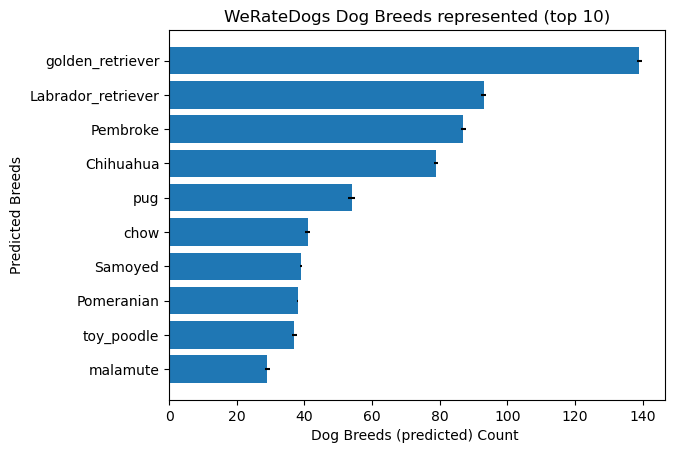

In [121]:
# Horizontal Bar Chart to visualize the top 10 breeds represented during the timeframe

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

names = top10_names.index.values 

y_pos = np.arange(len(names))

performance = top10_names.values
error = np.random.rand(len(names))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Dog Breeds (predicted) Count ')
ax.set_ylabel('Predicted Breeds')
ax.set_title('WeRateDogs Dog Breeds represented (top 10)')

plt.show()

[BACK TO TOP](#top)

In [72]:
# Data Exploration
new_tweets_df2.iloc[300:305,0:10]

,created_at,tweet_id,full_text,display_text_range,retweet_count,favorite_count,user,in_reply_to_status_id,in_reply_to_user_id,timestamp
300,2017-01-24 17:04:50+00:00,823939628516474880,This is Cash. He's officially given pup on tod...,"[0, 79]",2660,10508,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-01-24 17:04:50+00:00
301,2017-01-24 01:08:40+00:00,823699002998870016,This is Winston. The goggles make him a superh...,"[0, 135]",2481,13827,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-01-24 01:08:40+00:00
302,2017-01-23 17:20:14+00:00,823581115634085888,This is Crawford. He's quite h*ckin good at th...,"[0, 106]",2590,12889,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-01-23 17:20:14+00:00
303,2017-01-23 00:13:17+00:00,823322678127919110,This is Wyatt. He's got the fastest paws in th...,"[0, 106]",3954,15570,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-01-23 00:13:17+00:00
304,2017-01-22 01:12:59+00:00,822975315408461824,This is Albus. He's soaked as h*ck. Seems to h...,"[0, 118]",3390,17166,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-01-22 01:12:59+00:00


In [73]:
# Data Exploration
new_tweets_df2.iloc[300:305,11:20]

,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
300,This is Cash. He's officially given pup on tod...,https://twitter.com/dog_rates/status/823939628...,12,10,Cash,0,0,0,0
301,This is Winston. The goggles make him a superh...,https://twitter.com/dog_rates/status/823699002...,12,10,Winston,0,0,0,0
302,This is Crawford. He's quite h*ckin good at th...,https://twitter.com/dog_rates/status/823581115...,11,10,Crawford,0,0,0,0
303,This is Wyatt. He's got the fastest paws in th...,https://twitter.com/dog_rates/status/823322678...,11,10,Wyatt,0,0,0,0
304,This is Albus. He's soaked as h*ck. Seems to h...,https://twitter.com/dog_rates/status/822975315...,12,10,Albus,0,0,0,0


## <a name="prog1">Programmatic Assessment</a>

In [74]:
## Percentages that dog was catagorized affectionately
## Averages of doggo, floofer, pupper, & puppo. Essentially, how often have these been designated

## This means that 'doggo' was used to describe a pup 3.6% of the time

desig = ['doggo', 'floofer', 'pupper', 'puppo']

#new_tweets_df2.doggo.mean()

new_tweets_df2[desig].mean()

doggo      0.036757
floofer    0.004028
pupper     0.106747
puppo      0.011581
dtype: float64

In [75]:
## Owner named their dog this index the value number of times. There were a lot of missing values here
## Data Exploration 
## Names most used

new_tweets_df2.name.value_counts()

None           546
Oliver          10
Cooper          10
Charlie         10
Tucker           9
              ... 
Shakespeare      1
Murphy           1
Timofy           1
Bradley          1
Daniel           1
Name: name, Length: 933, dtype: int64

[BACK TO TOP](#top)

In [76]:
top10_names_used = list(top10_names.index)

In [77]:
newtop10

['golden_retriever',
 'Labrador_retriever',
 'Pembroke',
 'Chihuahua',
 'pug',
 'chow',
 'Samoyed',
 'Pomeranian',
 'toy_poodle',
 'malamute']

[BACK TO TOP](#top)

### <a name="prog2">More Programmatic Assessment</a> 

In [111]:
## Create grouping of dataframe on the first predicted name, p1, & obtained the mean of specific data points

# This one provides appropriate columns but it correctly displayed the resulting dataframe in p1 alphabetic order
# which is not statistically significant

name_by_avgs = new_tweets_df2.groupby("p1")[['p1_conf','rating_numerator','rating_denominator','favorite_count',
                                             'retweet_count']].mean()
#Actually, you just need to pull out the rows you want, top10names, from the name_by_avgs. It's just sorted alphabetically
#name_by_avgs = new_tweets_df2.groupby(new_tweets_df2[newtop10])[['p1_conf','rating_numerator','rating_denominator','doggo','floofer',
#                                                 'pupper','puppo','favorite_count','retweet_count']].mean()


name_by_avgs.head(10)

,p1_conf,rating_numerator,rating_denominator,favorite_count,retweet_count
p1,,,,,
Afghan_hound,0.433959,9.666667,10.0,15432.00,5072.333333
African_crocodile,0.330625,10.000000,10.0,864.00,230.000000
African_grey,0.270468,11.000000,10.0,4729.00,1094.000000
African_hunting_dog,0.733025,8.000000,10.0,1542.00,1021.000000
Airedale,0.583771,9.833333,10.0,4716.75,1190.666667
American_Staffordshire_terrier,0.636330,10.833333,10.0,5562.50,1606.500000
American_black_bear,0.219166,8.000000,10.0,4362.00,1120.000000
Angora,0.571526,7.000000,10.0,42585.50,14058.000000
Appenzeller,0.503665,11.000000,10.0,6553.00,1227.500000


In [104]:
# Get the highest average of retweets by predicted names.
p1_retweets = name_by_avgs.retweet_count.sort_values(ascending=False)
p1_retweets.head(10)

# The results indicate that tweets with pictures that are predicted as an "Arabian_camel" had an average retweet count of 17,424
# retweets. This insight says more about the neural network results and it's accuracy than the retweet specifics

p1
Arabian_camel    17424.0
conch            17304.0
upright          15837.0
bubble           14887.5
gondola          14345.5
Angora           14058.0
beaver           13907.0
laptop           13038.0
prison           12646.5
revolver         12633.0
Name: retweet_count, dtype: float64

In [79]:
top10stats = name_by_avgs.loc[newtop10]
top10stats.head(10)

,p1_conf,rating_numerator,rating_denominator,favorite_count,retweet_count
p1,,,,,
golden_retriever,0.721001,13.208633,11.424460,11135.107914,3126.431655
Labrador_retriever,0.652322,13.924731,12.580645,10439.086022,3269.989247
Pembroke,0.714500,11.436782,10.000000,10285.229885,2720.034483
Chihuahua,0.588905,10.708861,10.000000,7962.835443,2466.367089
pug,0.759223,10.240741,10.000000,5281.370370,1554.740741
chow,0.615648,11.609756,10.000000,9048.634146,2474.585366
Samoyed,0.740719,11.743590,10.000000,12032.538462,3848.000000
Pomeranian,0.743606,12.868421,10.000000,7310.131579,2439.236842
toy_poodle,0.617548,11.081081,10.000000,5748.837838,2055.270270


In [80]:
#name_by_avgs.reset_index(inplace=True)

In [81]:
#name_by_avgs.rename(columns= {'p1':'probable_name', 'p1_conf':'probability'}, inplace=True)

In [82]:
favorites_by_name = name_by_avgs.loc[:,['favorite_count']]
favorites_by_name. 

,favorite_count
p1,
Afghan_hound,15432.00
African_crocodile,864.00
African_grey,4729.00
African_hunting_dog,1542.00
Airedale,4716.75
...,...
wombat,6820.25
wood_rabbit,2232.00
wooden_spoon,14500.00


In [123]:
top15_favorites = favorites_by_name.iloc[0:15,:]
top15_favorites.t.sort_values(ascending=False)

p1
laptop           60764.0
conch            43257.0
limousine        42614.0
Angora           42585.5
fountain         40894.0
Arabian_camel    37607.5
bubble           37330.5
orange           35388.0
beaver           34891.0
prison           32107.5
revolver         31876.0
barbell          31806.0
basketball       31668.0
upright          30931.0
pole             30150.0
Name: favorite_count, dtype: float64

## <a name="vis2">Notable analysis from visual bar chart </a>

### None of the top 15 favorited 'dog's' images were acturately identified as dogs

In [124]:
# create sub
favorites_by_name = name_by_avgs.loc[:,['favorite_count']]
favorites_by_name.sort_values(by=['favorite_count'], ascending=False, inplace=True)
# get top 15 of new subset to create visual from
top15_favorites = favorites_by_name.iloc[0:15,:]
group_names = top15_favorites.index
group_data = top15_favorites.favorite_count

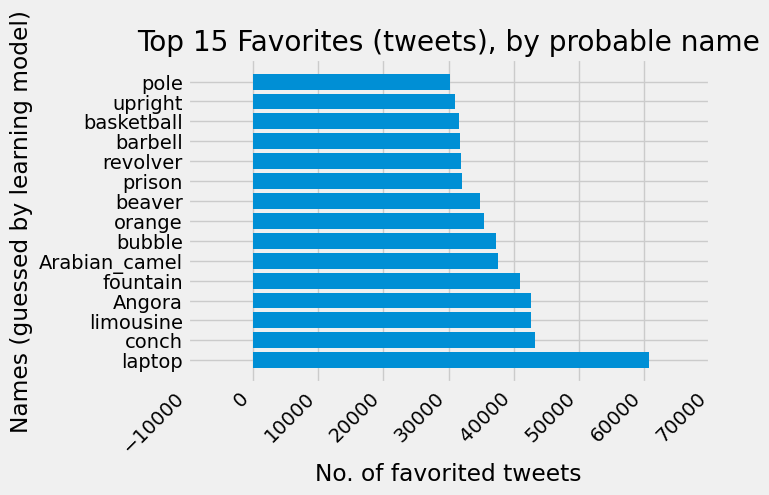

In [125]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(6, 4))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 70000], xlabel='No. of favorited tweets', ylabel='Names (guessed by learning model)',
       title='Top 15 Favorites (tweets), by probable name')

plt.show;

[BACK TO TOP](#top)

In [130]:
name_by_avgs.query("rating_numerator >= 10").rating_numerator.sort_values(ascending=False)

p1
bow_tie                        451.500000
microphone                     420.000000
lakeside                       108.000000
clumber                         27.000000
soft-coated_wheaten_terrier     25.454545
                                  ...    
desktop_computer                10.000000
dingo                           10.000000
espresso                        10.000000
four-poster                     10.000000
African_crocodile               10.000000
Name: rating_numerator, Length: 237, dtype: float64

In [126]:
name_by_avgs.rating_numerator.sort_values(ascending=False)

p1
bow_tie                        451.500000
microphone                     420.000000
lakeside                       108.000000
clumber                         27.000000
soft-coated_wheaten_terrier     25.454545
                                  ...    
scorpion                         2.000000
maze                             2.000000
electric_fan                     1.000000
lacewing                         1.000000
traffic_light                    0.000000
Name: rating_numerator, Length: 374, dtype: float64